In [ ]:
import pandas as pd
import requests
import os

In [2]:
data_file_path = 'data_export.csv'

In [3]:
image_download_path = 'images'
if not os.path.exists(image_download_path):
    os.makedirs(image_download_path)

In [4]:
df = pd.read_csv(data_file_path)

In [5]:
print("original data shape:", df.shape)

original data shape: (2645, 31)


In [6]:
df.isnull().sum()


title                      0
date                       0
specimenId               101
species                    0
sex                        0
abdomenStatus              1
morphSpecies            1235
morphSex                2501
morphAbdomenStatus      1743
morphNotes              2593
country                    0
district                   0
site                       1
image                     47
yolovConfidenceLevel      38
imageZoomed               38
status                    38
latitude                2336
longitude               2336
cityName                2390
deviceInUse             2562
phoneInUse              2562
deviceId                   0
localId                    0
collectionMethod           0
createdAt                  0
hardware                  58
isCompleted                0
name                       0
notes                   2083
updatedAt                  0
dtype: int64

In [7]:
df['morphSpecies'] = df['morphSpecies'].fillna('')

In [8]:
df['species'] = df['species'].str.strip()

In [9]:
df.loc[df['morphSpecies'] == '', 'morphSpecies'] = df['species']

In [10]:
df.head(5)

,title,date,specimenId,species,sex,abdomenStatus,morphSpecies,morphSex,morphAbdomenStatus,morphNotes,...,phoneInUse,deviceId,localId,collectionMethod,createdAt,hardware,isCompleted,name,notes,updatedAt
0,Testing black screen,9/1/23,1,Anopheles other,Female,FF - Fully Fed,Anopheles other,NaN,NaN,NaN,...,NaN,f5592ae3dbe9b574:0e775029-5e30-488b-9dee-c52c0...,1:11,Pyrethroid Spray Catch (PSC),2023-01-09T16:58:15.450Z,VectorCam V1,False,UserPhil,NaN,2023-01-09T16:58:15.450Z
1,hshs,9/1/23,1,Anopheles other,Female,G - Gravid,Anopheles other,NaN,NaN,NaN,...,NaN,835aaf65dbb3fbc1:3330c648-ad75-4c24-9ebc-53b3d...,1:01,Human Landing Catch (HLC),2023-01-10T05:46:45.386Z,VectorCam V3,False,Test,NaN,2023-01-10T05:46:45.386Z
2,TestCase,11/1/23,1,Anopheles funestus,Female,FF - Fully Fed,Anopheles funestus,NaN,NaN,NaN,...,NaN,59fc2e35fc8ca340:80262e5c-2297-4467-8435-daa2a...,1:01,Human Landing Catch (HLC),2023-01-16T10:03:48.132Z,VectorCam V3,False,Demo Device,NaN,2023-01-16T10:03:48.132Z
3,Testing black screen,9/1/23,2,Other,Female,FF - Fully Fed,Other,NaN,NaN,NaN,...,NaN,f5592ae3dbe9b574:0e775029-5e30-488b-9dee-c52c0...,1:12,Pyrethroid Spray Catch (PSC),2023-01-09T16:58:17.894Z,VectorCam V1,False,UserPhil,NaN,2023-01-09T16:58:17.894Z
4,hshs,9/1/23,2,Anopheles other,Female,G - Gravid,Anopheles other,NaN,NaN,NaN,...,NaN,835aaf65dbb3fbc1:3330c648-ad75-4c24-9ebc-53b3d...,1:02,Human Landing Catch (HLC),2023-01-10T05:46:44.837Z,VectorCam V3,False,Test,NaN,2023-01-10T05:46:44.837Z


In [11]:
df = df[~df['title'].str.contains('test', case=False, na=False)]
print("Shape after filtering 'test' in title:", df.shape)

Shape after filtering 'test' in title: (2433, 31)


In [12]:
df.head()

,title,date,specimenId,species,sex,abdomenStatus,morphSpecies,morphSex,morphAbdomenStatus,morphNotes,...,phoneInUse,deviceId,localId,collectionMethod,createdAt,hardware,isCompleted,name,notes,updatedAt
1,hshs,9/1/23,1,Anopheles other,Female,G - Gravid,Anopheles other,NaN,NaN,NaN,...,NaN,835aaf65dbb3fbc1:3330c648-ad75-4c24-9ebc-53b3d...,1:01,Human Landing Catch (HLC),2023-01-10T05:46:45.386Z,VectorCam V3,False,Test,NaN,2023-01-10T05:46:45.386Z
4,hshs,9/1/23,2,Anopheles other,Female,G - Gravid,Anopheles other,NaN,NaN,NaN,...,NaN,835aaf65dbb3fbc1:3330c648-ad75-4c24-9ebc-53b3d...,1:02,Human Landing Catch (HLC),2023-01-10T05:46:44.837Z,VectorCam V3,False,Test,NaN,2023-01-10T05:46:44.837Z
7,hshs,9/1/23,3,Anopheles other,Female,UF - Unfed,Anopheles other,NaN,NaN,NaN,...,NaN,835aaf65dbb3fbc1:3330c648-ad75-4c24-9ebc-53b3d...,1:03,Human Landing Catch (HLC),2023-01-10T05:46:47.003Z,VectorCam V3,False,Test,NaN,2023-01-10T05:46:47.003Z
10,hshs,9/1/23,4,Anopheles other,Female,G - Gravid,Anopheles other,NaN,NaN,NaN,...,NaN,835aaf65dbb3fbc1:3330c648-ad75-4c24-9ebc-53b3d...,1:04,Human Landing Catch (HLC),2023-01-10T05:46:47.866Z,VectorCam V3,False,Test,NaN,2023-01-10T05:46:47.866Z
13,Phil,10/1/23,6,Culex,Female,G - Gravid,Culex,NaN,NaN,NaN,...,NaN,f5592ae3dbe9b574:62d9cf7a-6770-4514-8d9c-f89bf...,1:05,Pyrethroid Spray Catch (PSC),2023-01-10T13:44:54.019Z,VectorCam V1,False,UserPhil,NaN,2023-01-10T13:44:54.019Z


In [13]:
df = df[~df['country'].str.contains('USA', case=False, na=False)]
print("Shape after filtering 'USA' in country:", df.shape)

Shape after filtering 'USA' in country: (2357, 31)


In [14]:
df= df[~df['country'].str.contains('india', case=False, na=False)]
# removed India as the images were not exactly of moquitoes 

In [15]:
df.shape

(2353, 31)

In [16]:
df['morphSpecies'].unique()

array(['Anopheles funestus', 'Anopheles gambiae', 'Anopheles other',
       'Culex', 'Mansonia', 'mansonia', 'MANSONIA', 'Other',
       'Anopheles Stephensi', 'Mansonia '], dtype=object)

In [ ]:
def download_image(url, file_name):
    # send a get request to the URL
    response = requests.get(url)
    # open a file for writing
    with open(file_name, 'wb') as f:
        # write the contents of the response to the file
        f.write(response.content)
 
for idx, row in df.iterrows():
    # get name and image column values from each row
    try:
        name = row['specimenId']
        url = row['image']
        full_path = os.path.join(image_download_path, name + ".jpg")
        download_image(url, full_path)
        print(name, url)
    except:
        print('Error')  # Ignore it

In [18]:
df.loc[df['morphSpecies'].str.strip().str.lower() == 'mansonia', 'morphSpecies'] = 'Mansonia'

In [19]:
df['morphSpecies'].unique()

array(['Anopheles funestus', 'Anopheles gambiae', 'Anopheles other',
       'Culex', 'Mansonia', 'Other', 'Anopheles Stephensi'], dtype=object)

In [20]:
df['morphSpecies'].value_counts()

morphSpecies
Anopheles funestus     1355
Mansonia                367
Culex                   278
Other                   226
Anopheles gambiae        72
Anopheles other          54
Anopheles Stephensi       1
Name: count, dtype: int64

In [21]:
df.isnull().sum()

title                      0
date                       0
specimenId                 5
species                    0
sex                        0
abdomenStatus              1
morphSpecies               0
morphSex                2215
morphAbdomenStatus      1466
morphNotes              2301
country                    0
district                   0
site                       0
image                     45
yolovConfidenceLevel      38
imageZoomed               38
status                    38
latitude                2099
longitude               2099
cityName                2152
deviceInUse             2322
phoneInUse              2322
deviceId                   0
localId                    0
collectionMethod           0
createdAt                  0
hardware                   2
isCompleted                0
name                       0
notes                   1791
updatedAt                  0
dtype: int64

In [22]:
df.columns

Index(['title', 'date', 'specimenId', 'species', 'sex', 'abdomenStatus',
       'morphSpecies', 'morphSex', 'morphAbdomenStatus', 'morphNotes',
       'country', 'district', 'site', 'image', 'yolovConfidenceLevel',
       'imageZoomed', 'status', 'latitude', 'longitude', 'cityName',
       'deviceInUse', 'phoneInUse', 'deviceId', 'localId', 'collectionMethod',
       'createdAt', 'hardware', 'isCompleted', 'name', 'notes', 'updatedAt'],
      dtype='object')

In [23]:
final = df[['specimenId','morphSpecies']]

In [24]:
final.head()

,specimenId,morphSpecies
92,DG025_01,Anopheles funestus
93,DL001,Anopheles funestus
94,DL001,Anopheles gambiae
95,DL001,Anopheles funestus
96,DL001,Anopheles funestus


In [25]:
final.shape

(2353, 2)

In [ ]:
final = final[final['morphSpecies'] != 'Anopheles Stephensi'] 

In [27]:
import os
import pandas as pd
import numpy as np
import cv2
from PIL import Image, ImageOps
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms # For data augmentation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from transformers import AutoImageProcessor, AutoModelForImageClassification # Using Hugging Face
from torch.utils.data import WeightedRandomSampler

# --- Configuration ---
IMAGE_DIR = 'images'

HF_MODEL_NAME = 'microsoft/swinv2-tiny-patch4-window8-256' 
NUM_CLASSES = 6  # Number of mosquito classes
BATCH_SIZE = 8   
LEARNING_RATE = 0.0001 
WEIGHT_DECAY = 0.01 # Weight decay for AdamW
NUM_EPOCHS = 10    
RANDOM_SEED = 42

/opt/anaconda3/envs/ensem/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"CUDA device found. Using {torch.cuda.get_device_name(0)}.")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("MPS device found. Using MPS.")
else:
    device = torch.device("cpu")
    print("No GPU or MPS found. Using CPU.")

MPS device found. Using MPS.


In [29]:
final_df_loaded = final.copy()
print("\n--- Data Preparation: Label Encoding and Image Paths ---")

final_df_loaded['specimenId'] = final_df_loaded['specimenId'].astype(str)

label_encoder = LabelEncoder()
final_df_loaded['label_encoded'] = label_encoder.fit_transform(final_df_loaded['morphSpecies'])

idx_to_class = {i: cls_name for i, cls_name in enumerate(label_encoder.classes_)}
class_to_idx = {cls_name: i for i, cls_name in enumerate(label_encoder.classes_)}
print("Label mapping created:")
for i, class_name in idx_to_class.items():
    print(f"  {i}: {class_name}")

final_df_loaded['image_path'] = final_df_loaded['specimenId'].apply(lambda x: os.path.join(IMAGE_DIR, x + '.jpg'))

initial_count = len(final_df_loaded)
final_df = final_df_loaded[final_df_loaded['image_path'].apply(os.path.exists)].copy() 

print(f"Number of samples after potentially filtering for existing images: {len(final_df)}")
if len(final_df) == 0:
    raise ValueError("No valid image paths found. Please check IMAGE_DIR and image filenames.")


--- Data Preparation: Label Encoding and Image Paths ---
Label mapping created:
  0: Anopheles funestus
  1: Anopheles gambiae
  2: Anopheles other
  3: Culex
  4: Mansonia
  5: Other
Number of samples after potentially filtering for existing images: 2317


In [30]:
print("\n--- Data Splitting (Train/Validation/Test) ---")

# Overall proportions: 70% train, 10% validation, 20% test

train_val_df, test_df = train_test_split(
    final_df,
    test_size=0.20, 
    random_state=RANDOM_SEED,
    stratify=final_df['label_encoded'] 
)

val_split_ratio = 0.125 

train_df, val_df = train_test_split(
    train_val_df,
    test_size=val_split_ratio,
    random_state=RANDOM_SEED,
    stratify=train_val_df['label_encoded'] 
)

train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print(f"Total samples: {len(final_df)}")
print(f"Training samples: {len(train_df)} ({len(train_df)/len(final_df)*100:.1f}%)")
print(f"Validation samples: {len(val_df)} ({len(val_df)/len(final_df)*100:.1f}%)")
print(f"Test samples: {len(test_df)} ({len(test_df)/len(final_df)*100:.1f}%)")


--- Data Splitting (Train/Validation/Test) ---
Total samples: 2317
Training samples: 1621 (70.0%)
Validation samples: 232 (10.0%)
Test samples: 464 (20.0%)


In [ ]:
# This is the core of my new preprocessing strategy for this notebook.
# I defined a function called 'crop_mosquito_from_path' to try and isolate the mosquito in each image.
# The idea is that by removing the plain white background, the model can focus better on the mosquito's actual features.
# Here's how it works:
#   1. It opens the image.
#   2. Converts it to grayscale because color isn't needed for this kind of segmentation.
#   3. Applies CLAHE (Contrast Limited Adaptive Histogram Equalization) to improve the local contrast,
#      which should make the (darker) mosquito stand out more from the (lighter) background.
#   4. Uses Otsu's thresholding on the CLAHE-enhanced image. Otsu's method automatically
#      finds a good threshold to create a black-and-white (binary) image, separating foreground from background.
#      I inverted the threshold so the mosquito becomes white (foreground for contour finding).
#   5. Finds all the distinct shapes (contours) in the binary image.
#   6. Assumes the largest contour is our mosquito and gets its bounding box (x, y, width, height).
#   7. Crops the *original color* image using this bounding box, adding a little padding around it.
#   8. If the crop is too small or if no contours are found, it just returns the original image as a fallback.
#   9. It also handles cases where the image file might not be found.
# The IMAGE_SIZE used in the default output_size is determined from the model's image_processor.

In [31]:

image_processor_for_size = AutoImageProcessor.from_pretrained(HF_MODEL_NAME)
IMAGE_SIZE = image_processor_for_size.size['shortest_edge'] if 'shortest_edge' in image_processor_for_size.size else image_processor_for_size.size['height']

def crop_mosquito_from_path(image_path, output_size=(IMAGE_SIZE, IMAGE_SIZE), padding=10):
    """
    Loads an image, applies CLAHE, then Otsu's thresholding to find the mosquito
    on a light background, crops it.
    Args:
        image_path (str): Path to the image.
        output_size (tuple): Not directly used for resizing here, augmentations will handle.
        padding (int): Padding to add around the detected bounding box.
    Returns:
        PIL.Image: Cropped RGB image, or original if cropping fails, or None if file not found.
    """
    try:
        pil_image = Image.open(image_path).convert('RGB')
        open_cv_image = np.array(pil_image)
        open_cv_image = open_cv_image[:, :, ::-1].copy()

        gray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        clahe_enhanced_gray = clahe.apply(gray)
        
        _, thresh = cv2.threshold(clahe_enhanced_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            x, y, w, h = cv2.boundingRect(largest_contour)

            x1 = max(0, x - padding)
            y1 = max(0, y - padding)
            x2 = min(open_cv_image.shape[1], x + w + padding)
            y2 = min(open_cv_image.shape[0], y + h + padding)

            cropped_pil_image = pil_image.crop((x1, y1, x2, y2))

            if cropped_pil_image.size[0] < 10 or cropped_pil_image.size[1] < 10:
                return pil_image 
            return cropped_pil_image
        else:
            return pil_image 
    except FileNotFoundError:
        print(f"ERROR: Image not found at {image_path} in crop_mosquito_from_path.")
        return None
    except Exception as e:
        print(f"Error during cropping for {image_path}: {e}. Using original image.")
        try:
            return Image.open(image_path).convert('RGB') 
        except:
            return None

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [ ]:
# This cell sets up how images are loaded and prepared, now incorporating my cropping function.
# I first get the 'image_processor' for the chosen model (e.g., SwinV2-tiny) to determine the
# target IMAGE_SIZE and for model-specific normalization.
# My augmentation pipelines ('standard_train_custom_transforms', 'aggressive_train_custom_transforms',
# 'val_test_custom_transforms') are defined here. A key change is that 'transforms.Resize(IMAGE_SIZE)'
# is now the *first* step in these pipelines. This is because my 'crop_mosquito_from_path' function
# returns a PIL image of the cropped mosquito, which can have varying dimensions. So, I resize it
# to the standard IMAGE_SIZE *before* applying other spatial augmentations like rotation.
#
# The 'MosquitoImageDataset' class is updated:
#   - In its '__getitem__' method, the first thing it does is call 'crop_mosquito_from_path'
#     to get the (potentially) cropped version of the image.
#   - If cropping fails or the image isn't found, it returns a dummy tensor.
#   - Then, it applies the appropriate set of augmentations (standard or aggressive for training,
#     or basic for validation/test) to this cropped image.
#   - Finally, it uses the Hugging Face 'image_processor' for the final model-specific preparation
#     (like converting to a tensor and normalizing).
# I also added an 'is_training_set' flag to the dataset constructor to clearly distinguish
# when to apply training augmentations versus validation/test transforms.
# The rest of the cell (creating dataset instances, calculating sampler weights) uses this updated dataset.

In [32]:
print("\n--- PyTorch Dataset Class Definition (with Targeted Augmentation) ---")

image_processor = AutoImageProcessor.from_pretrained(HF_MODEL_NAME)
IMAGE_SIZE = image_processor.size['shortest_edge'] if 'shortest_edge' in image_processor.size else image_processor.size['height']

standard_train_custom_transforms = transforms.Compose([
    transforms.Resize(IMAGE_SIZE), 
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(15),
])

TARGET_AGGRESSIVE_AUG_CLASSES = ['Anopheles gambiae', 'Anopheles other']

aggressive_train_custom_transforms = transforms.Compose([
    transforms.Resize(IMAGE_SIZE), 
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),
    transforms.RandomRotation(30),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10),
    transforms.GaussianBlur(kernel_size=(3, 7), sigma=(0.1, 2.0)),
])

val_test_custom_transforms = transforms.Compose([
    transforms.Resize(IMAGE_SIZE), 
])

class MosquitoImageDataset(Dataset):
    def __init__(self, dataframe, image_processor,
                 standard_transforms=None, aggressive_transforms=None,
                 aggressive_target_classes=None, is_training_set=False):
        self.dataframe = dataframe
        self.image_processor = image_processor
        self.standard_transforms = standard_transforms
        self.aggressive_transforms = aggressive_transforms
        self.aggressive_target_classes = aggressive_target_classes if aggressive_target_classes else []
        self.is_training_set = is_training_set

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        img_path = row['image_path']
        label = row['label_encoded']
        species_name = row['morphSpecies']

        image = crop_mosquito_from_path(img_path) 
        if image is None:
            dummy_image_tensor = torch.zeros((3, IMAGE_SIZE, IMAGE_SIZE))
            return {'pixel_values': dummy_image_tensor, 'labels': torch.tensor(-1, dtype=torch.long)}

        current_transforms_to_apply = None
        if self.is_training_set:
            if species_name in self.aggressive_target_classes and self.aggressive_transforms:
                current_transforms_to_apply = self.aggressive_transforms
            elif self.standard_transforms:
                current_transforms_to_apply = self.standard_transforms
        elif self.standard_transforms: 
            current_transforms_to_apply = self.standard_transforms

        if current_transforms_to_apply:
            image = current_transforms_to_apply(image)

        try:
            processed_inputs = self.image_processor(images=image, return_tensors="pt")
            pixel_values = processed_inputs['pixel_values'].squeeze(0)
        except Exception as e:
            dummy_image_tensor = torch.zeros((3, IMAGE_SIZE, IMAGE_SIZE))
            return {'pixel_values': dummy_image_tensor, 'labels': torch.tensor(-1, dtype=torch.long)}

        return {'pixel_values': pixel_values, 'labels': torch.tensor(label, dtype=torch.long)}


train_dataset = MosquitoImageDataset(
    train_df, image_processor,
    standard_transforms=standard_train_custom_transforms,
    aggressive_transforms=aggressive_train_custom_transforms,
    aggressive_target_classes=TARGET_AGGRESSIVE_AUG_CLASSES,
    is_training_set=True
)

val_dataset = MosquitoImageDataset(
    val_df, image_processor,
    standard_transforms=val_test_custom_transforms,
    is_training_set=False
)

test_dataset = MosquitoImageDataset(
    test_df, image_processor,
    standard_transforms=val_test_custom_transforms,
    is_training_set=False
)


print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")
print(f"Aggressive augmentation will be applied to: {TARGET_AGGRESSIVE_AUG_CLASSES}")

train_class_counts = train_df['label_encoded'].value_counts().sort_index()
class_weights_sampler = torch.tensor([1.0 / train_class_counts.get(i, float('inf')) for i in range(NUM_CLASSES)], dtype=torch.float)
sample_weights = torch.tensor([class_weights_sampler[label] for label in train_df['label_encoded']], dtype=torch.float)


--- PyTorch Dataset Class Definition (with Targeted Augmentation) ---
Train dataset size: 1621
Validation dataset size: 232
Test dataset size: 464
Aggressive augmentation will be applied to: ['Anopheles gambiae', 'Anopheles other']


In [33]:
print("\n--- DataLoaders ---")

def collate_fn(batch):
    batch = [item for item in batch if item['labels'].item() != -1]
    if not batch: 
        return None

    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = torch.tensor([item['labels'] for item in batch], dtype=torch.long)
    return {'pixel_values': pixel_values, 'labels': labels}
use_pin_memory = True if device.type == 'cuda' else False
train_sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE,sampler=train_sampler, collate_fn=collate_fn, num_workers=0, pin_memory=use_pin_memory)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn, num_workers=0, pin_memory=use_pin_memory)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn, num_workers=0, pin_memory=use_pin_memory)

print(f"Train DataLoader: {len(train_loader)} batches of size {BATCH_SIZE}")
print(f"Validation DataLoader: {len(val_loader)} batches of size {BATCH_SIZE}")
print(f"Test DataLoader: {len(test_loader)} batches of size {BATCH_SIZE}")


--- DataLoaders ---
Train DataLoader: 203 batches of size 8
Validation DataLoader: 29 batches of size 8
Test DataLoader: 58 batches of size 8


In [34]:
print("\n--- Model Setup ---")
model = AutoModelForImageClassification.from_pretrained(
    HF_MODEL_NAME,
    num_labels=NUM_CLASSES,
    ignore_mismatched_sizes=True 
).to(device) 

print(f"Model '{HF_MODEL_NAME}' loaded with {NUM_CLASSES} output classes and moved to {device}.")


--- Model Setup ---


Some weights of Swinv2ForImageClassification were not initialized from the model checkpoint at microsoft/swinv2-tiny-patch4-window8-256 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([6, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([6]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model 'microsoft/swinv2-tiny-patch4-window8-256' loaded with 6 output classes and moved to mps.


In [ ]:
# Setting up the learning components for this experiment with segmented images.
# 'optimizer': I'm using AdamW again.
# 'criterion': For this run with segmented images and the WeightedRandomSampler,
#   I decided to use the standard 'nn.CrossEntropyLoss' without explicit class weights,
#   to see if the combination of cropping and oversampling is effective on its own.
# 'scheduler': 'ReduceLROnPlateau' is kept to adjust the learning rate if validation performance stalls.

In [35]:
print("\n--- Optimizer and Loss Function ---")
total_train_samples = len(train_df)
class_weights_values = total_train_samples / (NUM_CLASSES * train_class_counts)
class_weights_tensor = torch.tensor(class_weights_values.values, dtype=torch.float).to(device)
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
criterion = nn.CrossEntropyLoss()
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1) # Example: reduce LR every 3 epochs
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.1) # Reduce on validation loss plateau

print(f"Optimizer: AdamW with LR={LEARNING_RATE}, Weight Decay={WEIGHT_DECAY}")


--- Optimizer and Loss Function ---
Optimizer: AdamW with LR=0.0001, Weight Decay=0.01


In [36]:
print("\n--- Training and Validation Loop ---")

train_losses = []
val_losses = []
val_accuracies = []

best_val_accuracy = 0.0
best_model_path =  f'{HF_MODEL_NAME.replace("/", "_")}_mosquito_SEG_classifier_best_model.pth' 
for epoch in range(NUM_EPOCHS):
    # --- Training Phase ---
    model.train()  
    running_loss = 0.0
    processed_batches_train = 0

    for i, batch in enumerate(train_loader):
        if batch is None: 
            print(f"Skipping training batch {i+1} due to all samples being invalid.")
            continue

        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()
        outputs = model(pixel_values).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        processed_batches_train += 1

        if (i + 1) % 10 == 0 or (i + 1) == len(train_loader): 
            if processed_batches_train > 0:
                 print(f"  Epoch [{epoch+1}/{NUM_EPOCHS}], Batch [{i+1}/{len(train_loader)}], Current Avg Batch Loss: {loss.item():.4f}")

    if processed_batches_train > 0:
        avg_epoch_train_loss = running_loss / processed_batches_train
        train_losses.append(avg_epoch_train_loss)
        print(f"Epoch {epoch+1}/{NUM_EPOCHS} - Average Training Loss: {avg_epoch_train_loss:.4f}")
    else:
        train_losses.append(float('inf')) 
        print(f"Epoch {epoch+1}/{NUM_EPOCHS} - No batches processed in training. Check data or batch filtering.")

    # --- Validation Phase ---
    model.eval()  
    val_running_loss = 0.0
    all_preds_val = []
    all_labels_val = []
    processed_batches_val = 0

    with torch.no_grad(): 
        for batch in val_loader:
            if batch is None:
                print(f"Skipping validation batch due to all samples being invalid.")
                continue

            pixel_values = batch['pixel_values'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(pixel_values).logits
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            processed_batches_val +=1

            _, predicted = torch.max(outputs, 1)
            all_preds_val.extend(predicted.cpu().numpy())
            all_labels_val.extend(labels.cpu().numpy())

    if processed_batches_val > 0 and len(all_labels_val) > 0:
        avg_epoch_val_loss = val_running_loss / processed_batches_val
        val_accuracy = accuracy_score(all_labels_val, all_preds_val)
        val_losses.append(avg_epoch_val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{NUM_EPOCHS} - Validation Loss: {avg_epoch_val_loss:.4f}, Validation Accuracy: {val_accuracy*100:.2f}%")

        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), best_model_path)
            print(f"  New best model saved to {best_model_path} with accuracy: {best_val_accuracy*100:.2f}%")

        if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
           scheduler.step(avg_epoch_val_loss)
        elif scheduler is not None:
           scheduler.step()

    else:
        val_losses.append(float('inf'))
        val_accuracies.append(0.0)
        print(f"Epoch {epoch+1}/{NUM_EPOCHS} - No batches processed in validation or no labels collected.")

print("Training and validation complete.")


--- Training and Validation Loop ---
  Epoch [1/10], Batch [10/203], Current Avg Batch Loss: 1.2720
  Epoch [1/10], Batch [20/203], Current Avg Batch Loss: 1.4162
  Epoch [1/10], Batch [30/203], Current Avg Batch Loss: 1.2717
  Epoch [1/10], Batch [40/203], Current Avg Batch Loss: 0.9468
  Epoch [1/10], Batch [50/203], Current Avg Batch Loss: 1.0241
  Epoch [1/10], Batch [60/203], Current Avg Batch Loss: 1.5503
  Epoch [1/10], Batch [70/203], Current Avg Batch Loss: 1.3394
  Epoch [1/10], Batch [80/203], Current Avg Batch Loss: 0.7913
  Epoch [1/10], Batch [90/203], Current Avg Batch Loss: 1.5425
  Epoch [1/10], Batch [100/203], Current Avg Batch Loss: 1.2683
  Epoch [1/10], Batch [110/203], Current Avg Batch Loss: 0.7692
  Epoch [1/10], Batch [120/203], Current Avg Batch Loss: 1.3799
  Epoch [1/10], Batch [130/203], Current Avg Batch Loss: 0.4757
  Epoch [1/10], Batch [140/203], Current Avg Batch Loss: 0.8006
  Epoch [1/10], Batch [150/203], Current Avg Batch Loss: 0.4323
  Epoch [1/

In [37]:
print("\n--- Final Evaluation on Test Set ---")

model.eval()  
all_preds_test = []
all_labels_test = []
test_running_loss = 0.0
processed_batches_test = 0

with torch.no_grad():
    for batch in test_loader:
        if batch is None:
            print(f"Skipping test batch due to all samples being invalid.")
            continue

        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(pixel_values).logits
        loss = criterion(outputs, labels)
        test_running_loss += loss.item()
        processed_batches_test += 1

        _, predicted = torch.max(outputs, 1)
        all_preds_test.extend(predicted.cpu().numpy())
        all_labels_test.extend(labels.cpu().numpy())

if processed_batches_test > 0 and len(all_labels_test) > 0:
    avg_test_loss = test_running_loss / processed_batches_test
    test_accuracy = accuracy_score(all_labels_test, all_preds_test)
    print(f"Test Set Evaluation Results:")
    print(f"  Average Test Loss: {avg_test_loss:.4f}")
    print(f"  Test Accuracy: {test_accuracy*100:.2f}%")

    print("\nTest Set Classification Report:")
    try:
        target_names = [idx_to_class[i] for i in range(NUM_CLASSES)]
        print(classification_report(all_labels_test, all_preds_test, target_names=target_names, zero_division=0))
    except Exception as e:
        print(f"Could not generate test classification report: {e}")
        print("Unique labels in test_labels:", set(all_labels_test))
        print("Unique labels in test_preds:", set(all_preds_test))

    print("\nTest Set Confusion Matrix:")
    try:
        conf_matrix = confusion_matrix(all_labels_test, all_preds_test, labels=list(range(NUM_CLASSES)))
        conf_matrix_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)
        print(conf_matrix_df)
    except Exception as e:
        print(f"Could not generate test confusion matrix: {e}")
else:
    print("No batches processed in test evaluation or no labels collected. Check test_loader and data.")



--- Final Evaluation on Test Set ---
Test Set Evaluation Results:
  Average Test Loss: 0.5404
  Test Accuracy: 87.07%

Test Set Classification Report:
                    precision    recall  f1-score   support

Anopheles funestus       0.93      0.91      0.92       267
 Anopheles gambiae       0.60      0.21      0.32        14
   Anopheles other       0.86      0.60      0.71        10
             Culex       0.98      0.93      0.95        55
          Mansonia       0.81      0.88      0.84        73
             Other       0.63      0.84      0.72        45

          accuracy                           0.87       464
         macro avg       0.80      0.73      0.74       464
      weighted avg       0.88      0.87      0.87       464


Test Set Confusion Matrix:
                    Anopheles funestus  Anopheles gambiae  Anopheles other  \
Anopheles funestus                 242                  2                1   
Anopheles gambiae                   10                  3    

In [38]:
# --- Optional: Save the Final Model ---
model_save_path_final_epoch = f'{HF_MODEL_NAME.replace("/", "_")}_mosquito_classifier_final_epoch.pth'
torch.save(model.state_dict(), model_save_path_final_epoch)
print(f"\nModel state_dict (from last epoch) saved to {model_save_path_final_epoch}")

# To save in Hugging Face format (model, config, processor):
output_dir = "./swinv2_mosquito_classifier_hf_format"
model.save_pretrained(output_dir)
image_processor.save_pretrained(output_dir) # Save the processor too
print(f"Full model and processor saved in Hugging Face format to {output_dir}")


Model state_dict (from last epoch) saved to microsoft_swinv2-tiny-patch4-window8-256_mosquito_classifier_final_epoch.pth
Full model and processor saved in Hugging Face format to ./swinv2_mosquito_classifier_hf_format


In [39]:
print("\n--- Final Evaluation on Test Set ---")

if os.path.exists(best_model_path):
    model.load_state_dict(torch.load(best_model_path, map_location=device))
    print(f"Loaded best model from {best_model_path} for final evaluation.")
else:
    print("Best model path not found. Evaluating with the model from the last epoch.")

model.eval()  
all_preds_test = []
all_labels_test = []
test_running_loss = 0.0
processed_batches_test = 0

with torch.no_grad():
    for batch in test_loader:
        if batch is None:
            print(f"Skipping test batch due to all samples being invalid.")
            continue

        pixel_values = batch['pixel_values'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(pixel_values).logits
        loss = criterion(outputs, labels) 
        test_running_loss += loss.item()
        processed_batches_test += 1

        _, predicted = torch.max(outputs, 1)
        all_preds_test.extend(predicted.cpu().numpy())
        all_labels_test.extend(labels.cpu().numpy())

if processed_batches_test > 0 and len(all_labels_test) > 0:
    avg_test_loss = test_running_loss / processed_batches_test
    test_accuracy = accuracy_score(all_labels_test, all_preds_test)
    print(f"Test Set Evaluation Results:")
    print(f"  Average Test Loss: {avg_test_loss:.4f}")
    print(f"  Test Accuracy: {test_accuracy*100:.2f}%")

    print("\nTest Set Classification Report:")
    try:
        target_names = [idx_to_class[i] for i in range(NUM_CLASSES)]
        print(classification_report(all_labels_test, all_preds_test, target_names=target_names, zero_division=0))
    except Exception as e:
        print(f"Could not generate test classification report: {e}")
        print("Unique labels in test_labels:", set(all_labels_test))
        print("Unique labels in test_preds:", set(all_preds_test))

    print("\nTest Set Confusion Matrix:")
    try:
        conf_matrix = confusion_matrix(all_labels_test, all_preds_test, labels=list(range(NUM_CLASSES)))
        conf_matrix_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)
        print(conf_matrix_df)
    except Exception as e:
        print(f"Could not generate test confusion matrix: {e}")
else:
    print("No batches processed in test evaluation or no labels collected. Check test_loader and data.")



--- Final Evaluation on Test Set ---
Loaded best model from microsoft_swinv2-tiny-patch4-window8-256_mosquito_SEG_classifier_best_model.pth for final evaluation.
Test Set Evaluation Results:
  Average Test Loss: 0.5404
  Test Accuracy: 87.07%

Test Set Classification Report:
                    precision    recall  f1-score   support

Anopheles funestus       0.93      0.91      0.92       267
 Anopheles gambiae       0.60      0.21      0.32        14
   Anopheles other       0.86      0.60      0.71        10
             Culex       0.98      0.93      0.95        55
          Mansonia       0.81      0.88      0.84        73
             Other       0.63      0.84      0.72        45

          accuracy                           0.87       464
         macro avg       0.80      0.73      0.74       464
      weighted avg       0.88      0.87      0.87       464


Test Set Confusion Matrix:
                    Anopheles funestus  Anopheles gambiae  Anopheles other  \
Anopheles fune

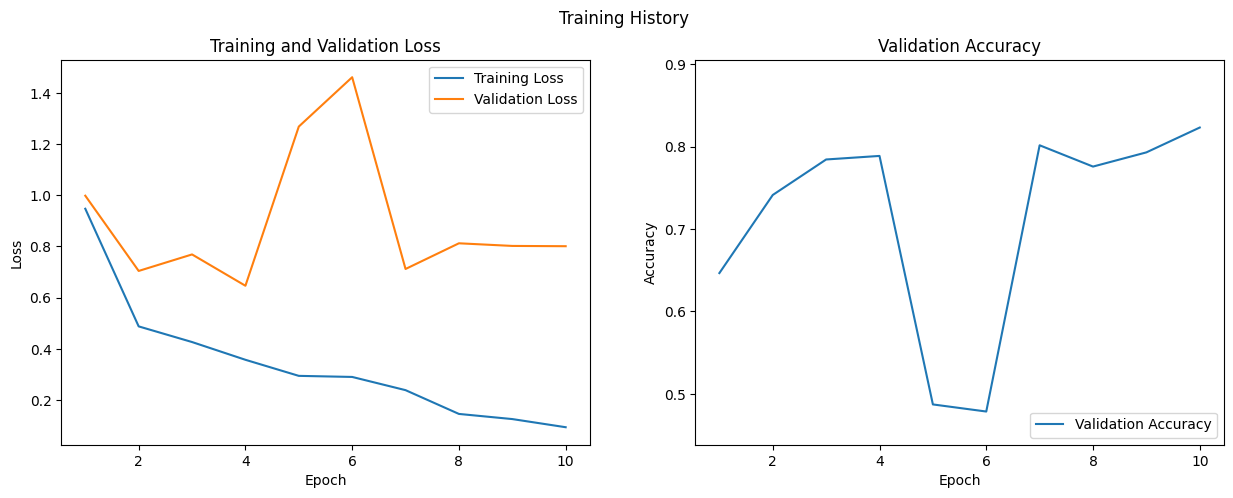

In [40]:

import matplotlib.pyplot as plt

if train_losses and val_losses and val_accuracies:
    epochs_range = range(1, len(train_losses) + 1)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_losses, label='Training Loss')
    plt.plot(epochs_range, val_losses, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim())*0.95, max(min(max(val_accuracies)*1.1, 1.0), 0.1)]) # Adjust y-axis for accuracy

    plt.suptitle('Training History')
    plt.show()
else:
    print("Not enough data to plot training history (losses/accuracies lists are empty or incomplete).")